<a href="https://colab.research.google.com/github/ekaratnida/Automated_Tools-/blob/main/Module3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Forecasting Using FbProphet

In [21]:
#!pip install pystan
#!pip install fbprophet
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import os
%matplotlib inline
# check prophet version
# print version number


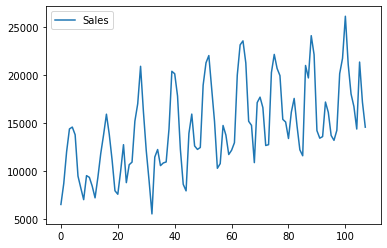

In [22]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/ekaratnida/applied-machine-learning/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

In [23]:
print(df)

       Month  Sales
0    1960-01   6550
1    1960-02   8728
2    1960-03  12026
3    1960-04  14395
4    1960-05  14587
..       ...    ...
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577

[108 rows x 2 columns]


In [24]:
# prepare expected column names
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **In sample forecast**

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12874.052597  15942.202231
1 1968-02-01  14905.955964  13297.143549  16406.284510
2 1968-03-01  20842.150502  19098.149422  22400.735648
3 1968-04-01  22870.095215  21237.625517  24556.075529
4 1968-05-01  24176.211162  22758.591649  25792.872853


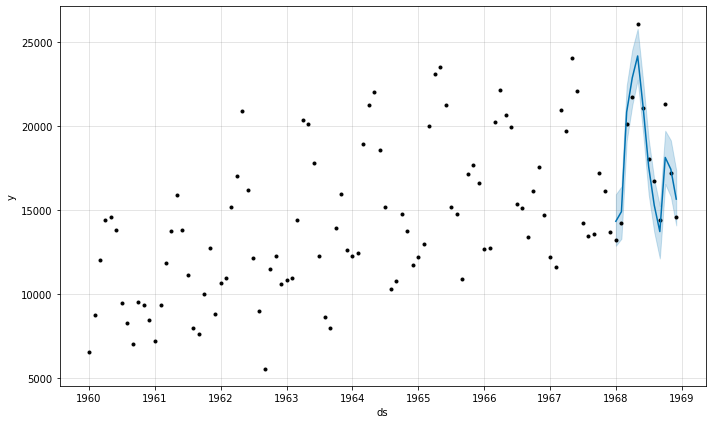

In [25]:
# define the period for which we want a prediction

from pandas import DataFrame

future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

### **Out of sample forecast**

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13827.871865  16945.082699
1 1969-02-01  16142.271673  14628.513791  17770.503859
2 1969-03-01  21351.832640  19884.046084  22765.773553
3 1969-04-01  23477.889811  21857.620311  24956.696833
4 1969-05-01  24988.440907  23431.748369  26473.913303


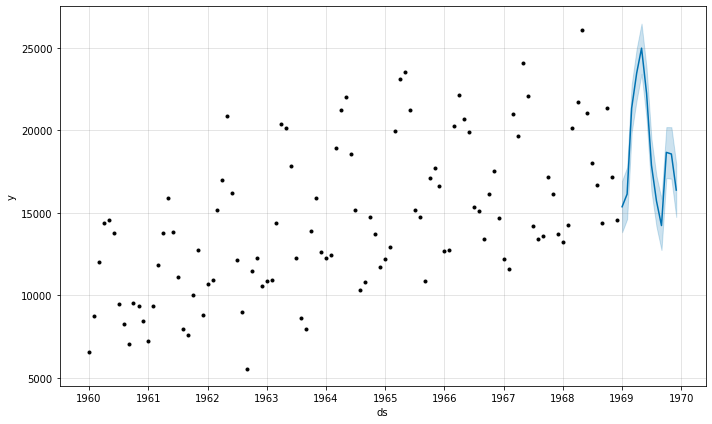

In [26]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

#### **Evaluation**

MAE: 1369.485


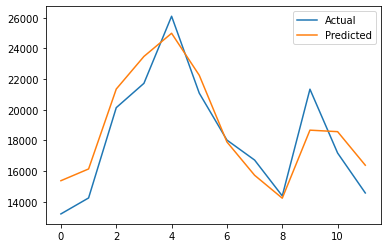

In [27]:
# calculate MAE between expected and predicted values for december
from sklearn.metrics import mean_absolute_error

y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

### **Airplane**

In [28]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=12)

In [29]:
future_dates

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
...,...
115,1968-12-09
116,1968-12-10
117,1968-12-11
118,1968-12-12


In [31]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 1962-01-02 00:00:00 and 1967-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1962-02-01,11681.836819,11316.491858,12000.567060,10947,1962-01-02
1,1962-03-01,14642.066887,14305.111481,14987.151810,15200,1962-01-02
2,1962-04-01,16139.567922,15779.654376,16483.946414,17010,1962-01-02
3,1962-05-01,20238.651742,19877.518075,20623.187671,20900,1962-01-02
4,1962-06-01,16914.322567,16562.283593,17303.938623,16205,1962-01-02


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')